# This project goals to predict the weather variables using regression algorithms.
The dataset used for this project is sourced from Kaggle, specifically from the "Szeged Weather" dataset by budincsevity. The dataset contains historical weather information for the city of Szeged, Hungary.

The project utilizes machine learning algorithms to build a regression model that can accurately predict weather variables such as Visibility (km). The dataset consists of various features like temperature, humidity, wind speed, wind bearing, visibility, summary, and precipitation. These features will be used to train and test the regression models.

# Importing Libraries

In [160]:
!pip install lazypredict
!pip3 install optuna
!pip3 install xgboost

     -------------------------------------- 390.6/390.6 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 224.5/224.5 kB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 4.3 MB/s eta 0:00:00


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
#from google.colab import files
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import optuna


# Loading Dataset

In [3]:
# defining a data frame
df = pd.read_csv("C:/Users/npawl/Downloads/weatherHistory/weatherHistory.csv",index_col=False) 
# Read a comma-separated values (csv) file into DataFrame.

# Exploratory Data Analysis (EDA)





In [4]:
# return the first 5 rows
df.head() # check the column name and the look of the data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51,Partly cloudy throughout the day.


In [5]:
# return the last 5 rows
df.tail() # we check the number of rows and the look of the data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.02,26.02,0.43,11.00,31.00,16.10,0.00,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58,24.58,0.48,10.09,20.00,15.55,0.00,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.04,22.04,0.56,8.98,30.00,16.10,0.00,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52,21.52,0.60,10.53,20.00,16.10,0.00,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.44,20.44,0.61,5.88,39.00,15.52,0.00,1016.16,Partly cloudy starting in the morning.


Observation: The Daily Summary is the same for the whole day, so we will use the Summary to figure out the weather for a given hour. Daily Summary will remove later.

In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51,Partly cloudy throughout the day.


In [7]:
df.shape # get the number of rows (96453) and the number of columns (12)

(96453, 12)

In [8]:
df.size #  returns the number of elements in the DataFrame.

1157436

In [9]:
df.columns # gives the name of the column

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
df.info() # prints information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Observation: DataFrame contains 12 columns, 4 categorical, 8 numerical and Precip Type has a different Non-Null value than the number of rows as the entry that it contains missing values

* Let's perform modeling without data transformation in order to check the effectiveness of data mining

In [11]:
# prepare variable
y_basic = df['Visibility (km)'] # the target

# the features excluding the target variable, only numerical, with intuition, we will remove the Apparent Temperature that is too close to the Temperature
X_basic = df.drop(['Visibility (km)','Formatted Date','Summary', 'Precip Type', 'Daily Summary'], axis=1)

# split data into train and test with an 8:2 ratio
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic,y_basic,test_size=0.3,random_state=111)

regr = RandomForestRegressor(random_state=111)
regr.fit(X_train_basic, y_train_basic)
y_pred_basic = regr.predict(X_test_basic)

In [12]:
# check results

# What %y explains our model, the best value 1. The higher the R2 value, the better the fit of the regression to the dataset.
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test_basic, y_pred_basic),2)))

print('')

# MAE (Mean Absolute Error) measures the average difference between predicted and actual values. The best value is 0.0
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test_basic, y_pred_basic),2)))


Random Forest Regressor R2 score: 0.54

Random Forest Regressor MAE score: 2.22


Observation: The result is not satisfactory, the model evaluates half of the predictions well

In [13]:
# generate descriptive statistics
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00
mean,11.93,10.86,0.73,10.81,187.51,10.35,0.00,1003.24
std,9.55,10.70,0.20,6.91,107.38,4.19,0.00,116.97
min,-21.82,-27.72,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.69,2.31,0.60,5.83,116.00,8.34,0.00,1011.90
50%,12.00,12.00,0.78,9.97,180.00,10.05,0.00,1016.45
75%,18.84,18.84,0.89,14.14,290.00,14.81,0.00,1021.09
max,39.91,39.34,1.00,63.85,359.00,16.10,0.00,1046.38


Observation: The Apparent Temperature (C) value is too similar to Apparent Temperature (C), Loud Cover has one value, not relevant to the analysis, so it will be removed, Pressure contains the impossible value 0, we will check this later

In [14]:
# drop unnecessary column; Loud Cover all contains 0, one column
df.drop(['Loud Cover'],axis = 1,inplace = True)

<Axes: >

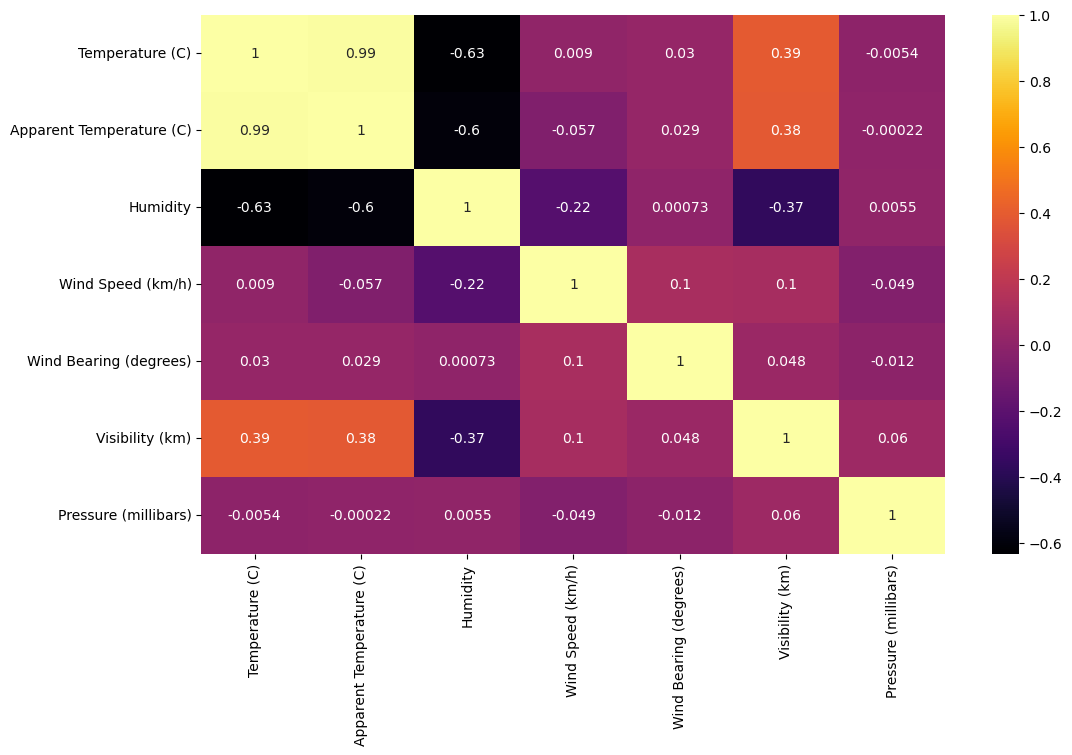

In [15]:
# method finds the correlation of each column in a DataFrame
corr_df=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_df,annot=True,fmt='.2g',cmap='inferno')

* positive correlation - it can be said when the values of two variables change in the same direction. So if one grows, the other behaves the same way.
* negative correlation - in this case, the situation is quite different. A negative correlation means that the values of interdependent variables change in opposite directions. So if one value goes up, the other goes down, and vice versa.
* lack of correlation is a situation in which phenomena, features, and properties have no connection with themselves. 

Obseravtion: A high result between the temperature and the apparent temperature  means that the correlation is too hight, it should be removed.

In [16]:
# drop unnecessary column; Apparent Temperature (C)
df.drop(['Apparent Temperature (C)'],axis = 1,inplace = True)

In [17]:
# checking missing values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

Observation: probably missing a value means that the precip type is not visible,fill it with none

In [18]:
# fill missing values Precip type to none as no precipitation
df.fillna('none', inplace = True)

In [19]:
df['Precip Type'].value_counts() # checking whether to correctly fill in the missing values for none

rain    85224
snow    10712
none      517
Name: Precip Type, dtype: int64

Observation: missing values have been filled in correctly

In [20]:
# duplicate checking
df.duplicated().sum()

24

Observation: there are 24 duplicates that should be removed

In [21]:
# drop duplicates
df.drop_duplicates(keep="first", inplace=True)

# Data Visualization

In [22]:
# drop unnecessary column; Daily Summary, reproducible and not relevant for to the analysis
df.drop(['Daily Summary'],axis = 1,inplace = True)

Categorical columns:

In [23]:
cat = ['Summary','Precip Type']

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 2


Numerical columns:

In [24]:
num = []
for i in df.columns:
    if i not in cat:
        num.append(i)
print('No. of numerical/float columns are:',len(num))

No. of numerical/float columns are: 7


Exploring Categorical Columns/Features

In [25]:
# Checking the number of unique values for each text column
df['Summary'].value_counts()

Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

Observation: there is a large discrepancy in the number, less frequent ones will be marked as Other

In [26]:
# describing less significant variables as other
allowed_vals = ['Partly Cloudy',
                'Mostly Cloudy',
                'Overcast',
                'Clear',
                'Foggy',
                'Breezy and Overcast',
                'Breezy and Mostly Cloudy',
                'Breezy and Partly Cloudy'
                ]

df.loc[~df["Summary"].isin(allowed_vals), "Summary"] = "Other"
df.Summary.value_counts()

Partly Cloudy               31726
Mostly Cloudy               28094
Overcast                    16597
Clear                       10873
Foggy                        7148
Other                         561
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Name: Summary, dtype: int64

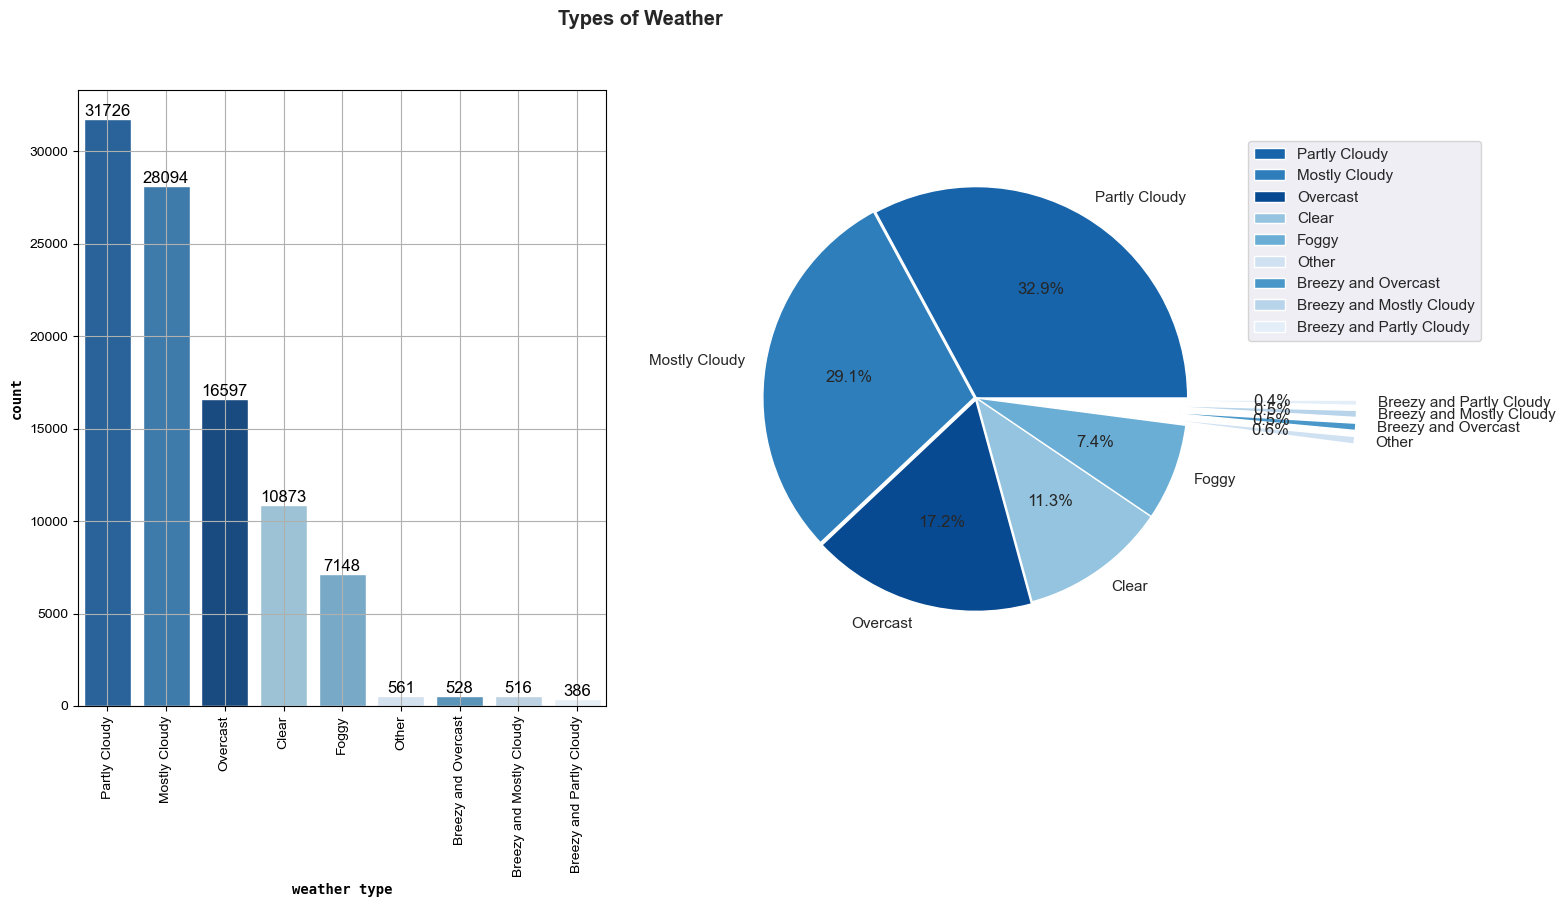

In [27]:
# Let's see how the Summary looks on the chart and how much of it is represented as a percentage.
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Summary'].value_counts().index
y=df['Summary'].value_counts().values.tolist()
data = df.groupby("Summary").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

#Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
#Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('weather type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

#Create a pie chart, _, _,
_, _, autotexts= ax[1].pie(y, labels = x, colors = np.array(pal[::-1])[rank], autopct='%1.1f%%',
explode=[0,.01, 0.01,0,0 ,0.8,0.8,0.8,0.8])

plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Weather',weight = 'bold')
plt.show()


Observation: The most common types of weather are Partly Cloudy, Mostly Cloudy and Overcast.

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

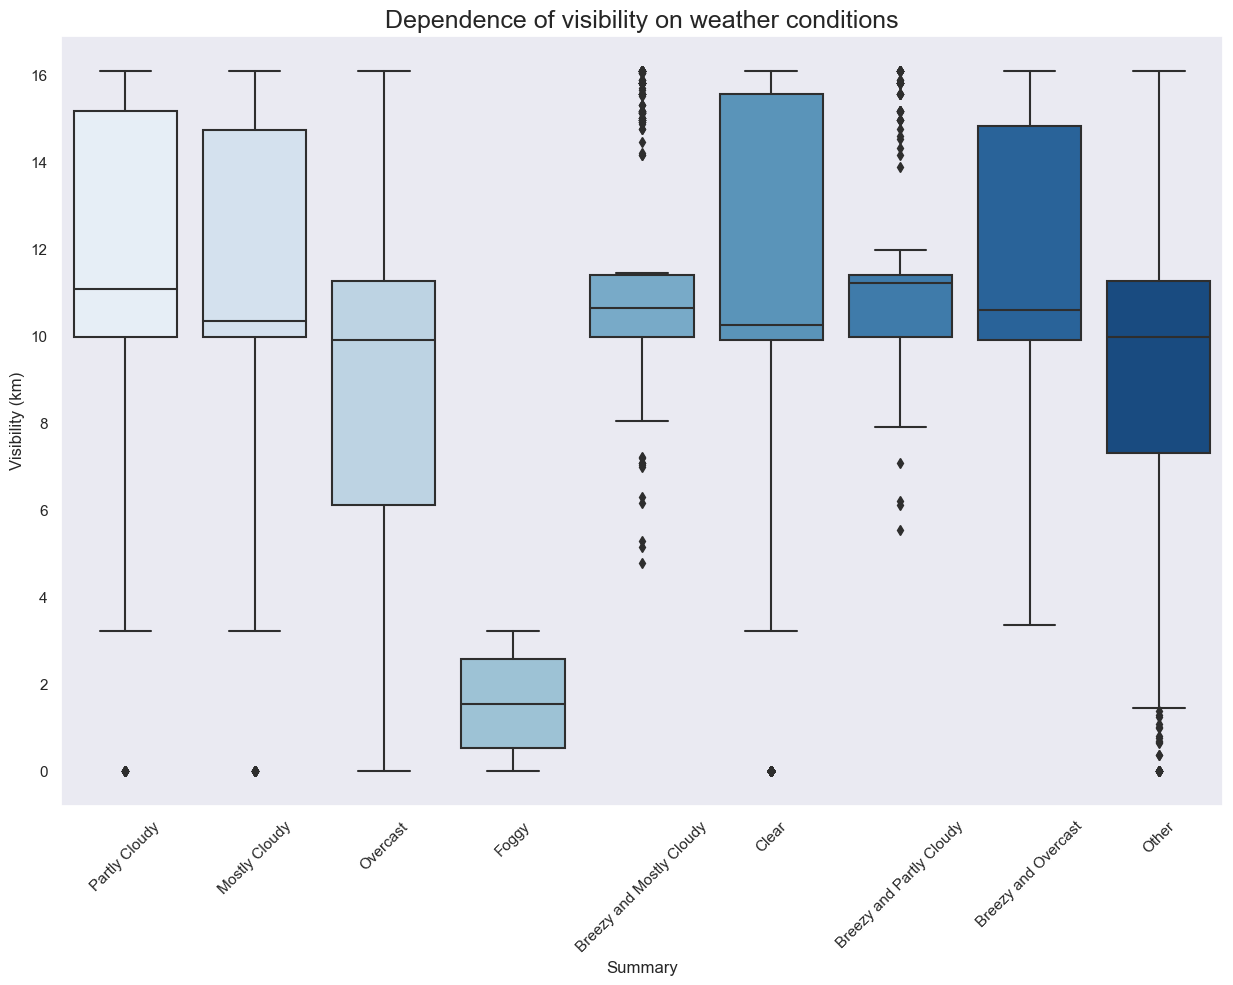

In [28]:
# Let's check the distribution of data in a boxplot

fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

* The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.
* The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range. (just a whole box)
* Seventy-five percent of the scores fall below the upper quartile. (from the bottom end of the box)
* The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.
* An outlier is an observation that is numerically distant from the rest of the data.

Observation: variable clear, mostly cloudly, partly cloudly contains outliers, incorrect values Visibility 0. cloudiness itself does not significantly affect visibility, check it out more closely.

In [29]:
# providing variable clear outliers
Clear_outliers = df.loc[(df.Summary == 'Clear') & (df["Visibility (km)"] == 0)]
Clear_outliers

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
14120,2007-03-19 08:00:00.000 +0100,Clear,rain,10.56,0.63,3.22,110.00,0.00,996.60
14123,2007-03-19 11:00:00.000 +0100,Clear,rain,15.00,0.46,11.27,150.00,0.00,994.70
26352,2009-04-10 00:00:00.000 +0200,Clear,rain,10.56,0.66,3.22,320.00,0.00,1017.20
26664,2009-04-22 00:00:00.000 +0200,Clear,rain,13.33,0.47,14.49,30.00,0.00,1015.00
26665,2009-04-22 01:00:00.000 +0200,Clear,rain,12.22,0.50,11.27,40.00,0.00,1015.70
...,...,...,...,...,...,...,...,...,...
95575,2016-10-31 10:00:00.000 +0100,Clear,none,7.69,0.75,8.58,264.00,0.00,1024.20
95576,2016-10-31 11:00:00.000 +0100,Clear,none,9.59,0.71,11.13,276.00,0.00,1023.70
95577,2016-10-31 12:00:00.000 +0100,Clear,none,11.49,0.69,14.06,284.00,0.00,1023.06
95578,2016-10-31 13:00:00.000 +0100,Clear,none,12.77,0.67,22.54,286.00,0.00,1022.49


Change the visibility with the median below, there are 271 outliers

In [30]:
# check median values for summary == clear
clear_median = df.loc[(df.Summary == 'Clear'),'Visibility (km)'].median()
clear_median

10.2557

In [31]:
# select the appropriate column and replace the Visibility values 0 -> 10.26 
df.loc[df.Summary == 'Clear',"Visibility (km)"] = df.loc[df.Summary == 'Clear',"Visibility (km)"].replace((0,10.26))

In [39]:
# check if it replaced properly, if so it return 0
len(df.loc[(df.Summary == 'Clear') & (df["Visibility (km)"] == 0)])

0

In [33]:
# check the values of invalid visibility in mostly cloudy
mostly_outliers = df.loc[((df.Summary == 'Mostly Cloudy') & (df["Visibility (km)"] == 0))]
len(mostly_outliers) 

36

There are 36 incorrect values, change the visibility with the median below

In [35]:
# check median for Mostlu Cloudly
mostly_median = df.loc[(df.Summary == 'Mostly Cloudy'),'Visibility (km)'].median()
mostly_median

10.3523

In [36]:
# replace 0 with mostly_median, Visibility 0 -> 10,35
df.loc[df.Summary == 'Mostly Cloudy',"Visibility (km)"] = df.loc[df.Summary == 'Mostly Cloudy',"Visibility (km)"].replace((0,10.35))

In [38]:
# check if it replaced properly, if so it return 0
len(df.loc[((df.Summary == 'Mostly Cloudy') & (df["Visibility (km)"] == 0))])

0

In [41]:
# similarly as above, we make the same changes for Partly Cloudy
partly_outliers = df.loc[((df.Summary == 'Partly Cloudy') & (df["Visibility (km)"] == 0))]
len(partly_outliers) 

27

In [44]:
partly_median = df.loc[(df.Summary == 'Partly Cloudy'),'Visibility (km)'].median()
df.loc[df.Summary == 'Partly Cloudy',"Visibility (km)"] = df.loc[df.Summary == 'Partly Cloudy',"Visibility (km)"].replace((0,partly_median))

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

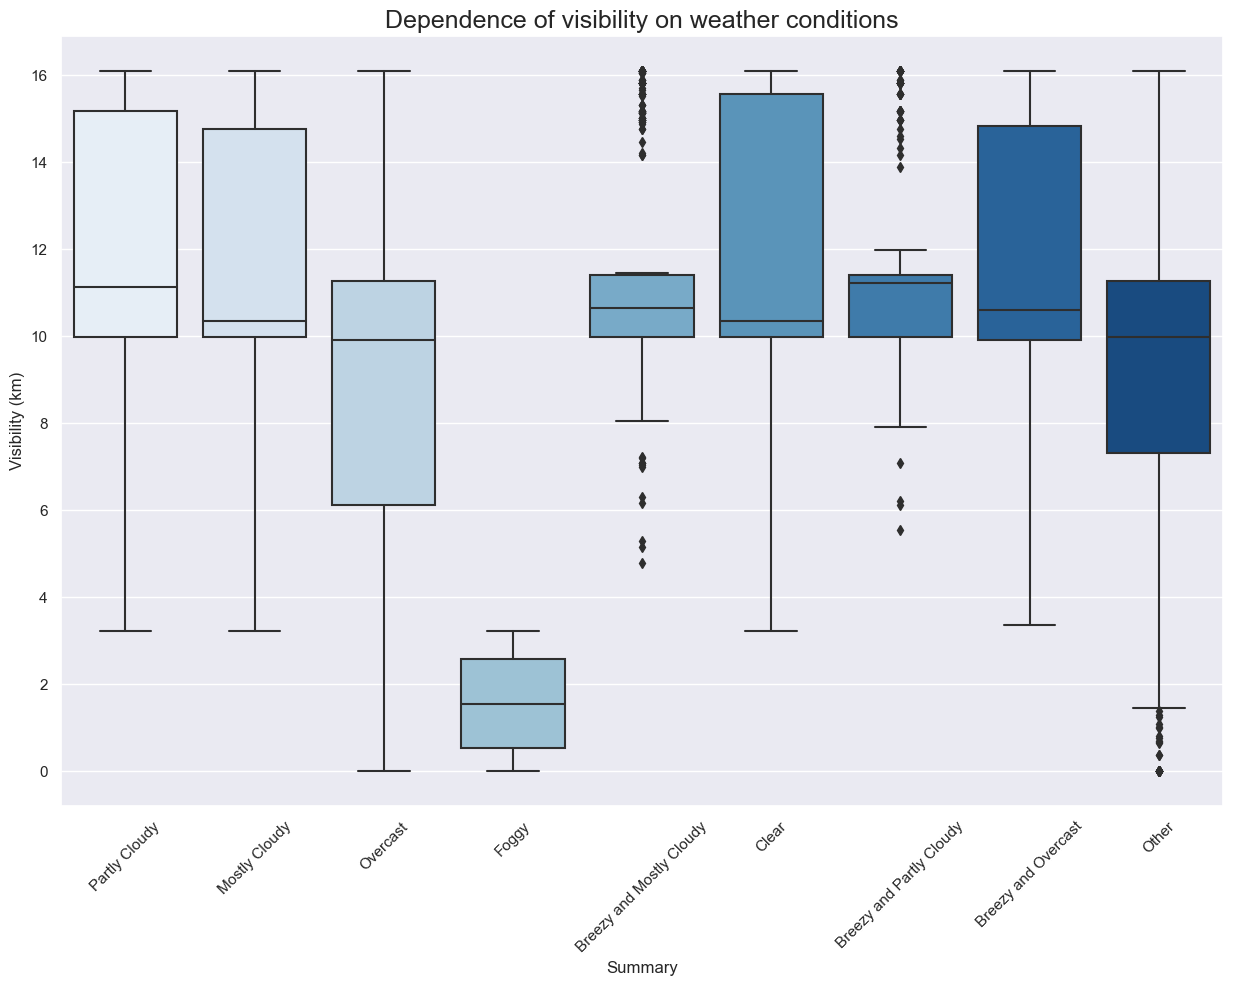

In [45]:
# checking value after cleaning 
fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

The boxplot shows the lack of the above outliers

In [46]:
# Let's see how the Precip Type looks on the chart and how much of it is represented as a percentage.
df['Precip Type'].value_counts()

rain    85200
snow    10712
none      517
Name: Precip Type, dtype: int64

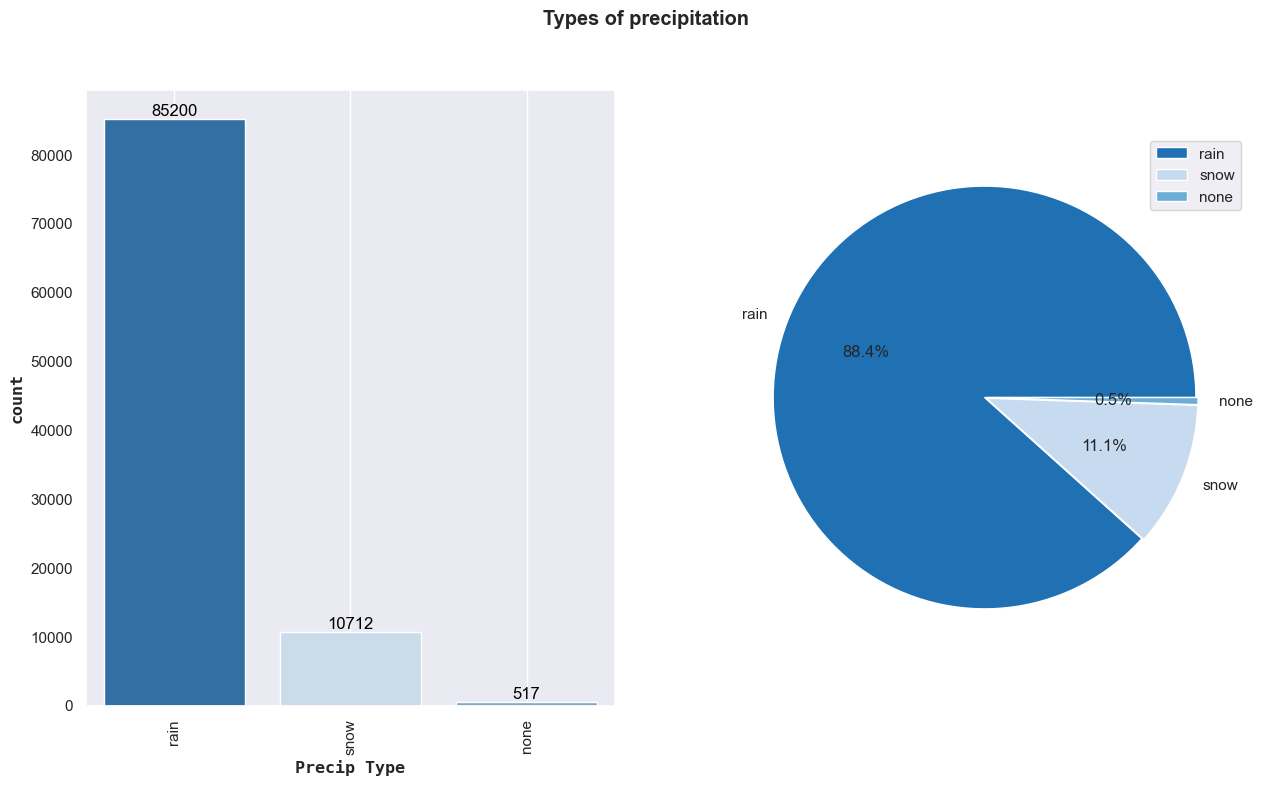

In [47]:
# check the data count and percentage ratio for Precip type on the chart
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Precip Type'].value_counts().index
y=df['Precip Type'].value_counts().values.tolist()
data = df.groupby("Precip Type").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

# Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
# Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('Precip Type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

# Create a pie chart,
_, _, autotexts= ax[1].pie(y, labels = x, colors = np.array(pal[::-1])[rank], autopct='%1.1f%%',
        explode=[0,.01, 0.01])


plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of precipitation ',weight = 'bold')
plt.show()

Observation: The most common type of precipitation is rain.

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

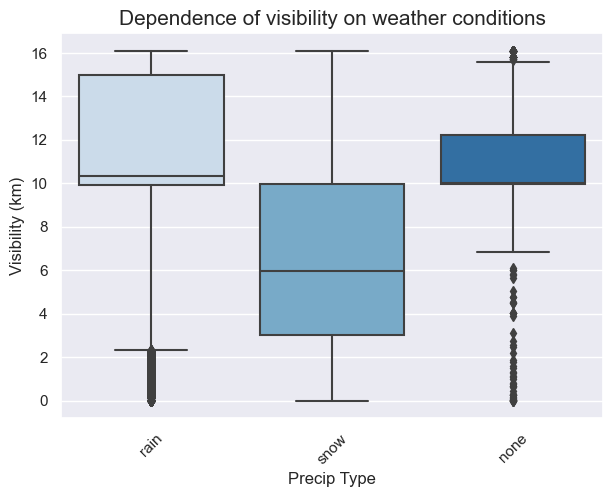

In [49]:
fig,ax=plt.subplots(figsize=(7,5))

sns.set_style('darkgrid')
sns.boxplot(x='Precip Type',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "15")

Observation: Snow reduces visibility more than rain, outliers for rain and no precipitation are visible, but they may be related to other atomospheric phenomena, e.g. fog

## Exploring Numerical/Float variables

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>],
       [<Axes: title={'center': 'Visibility (km)'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>]], dtype=object)

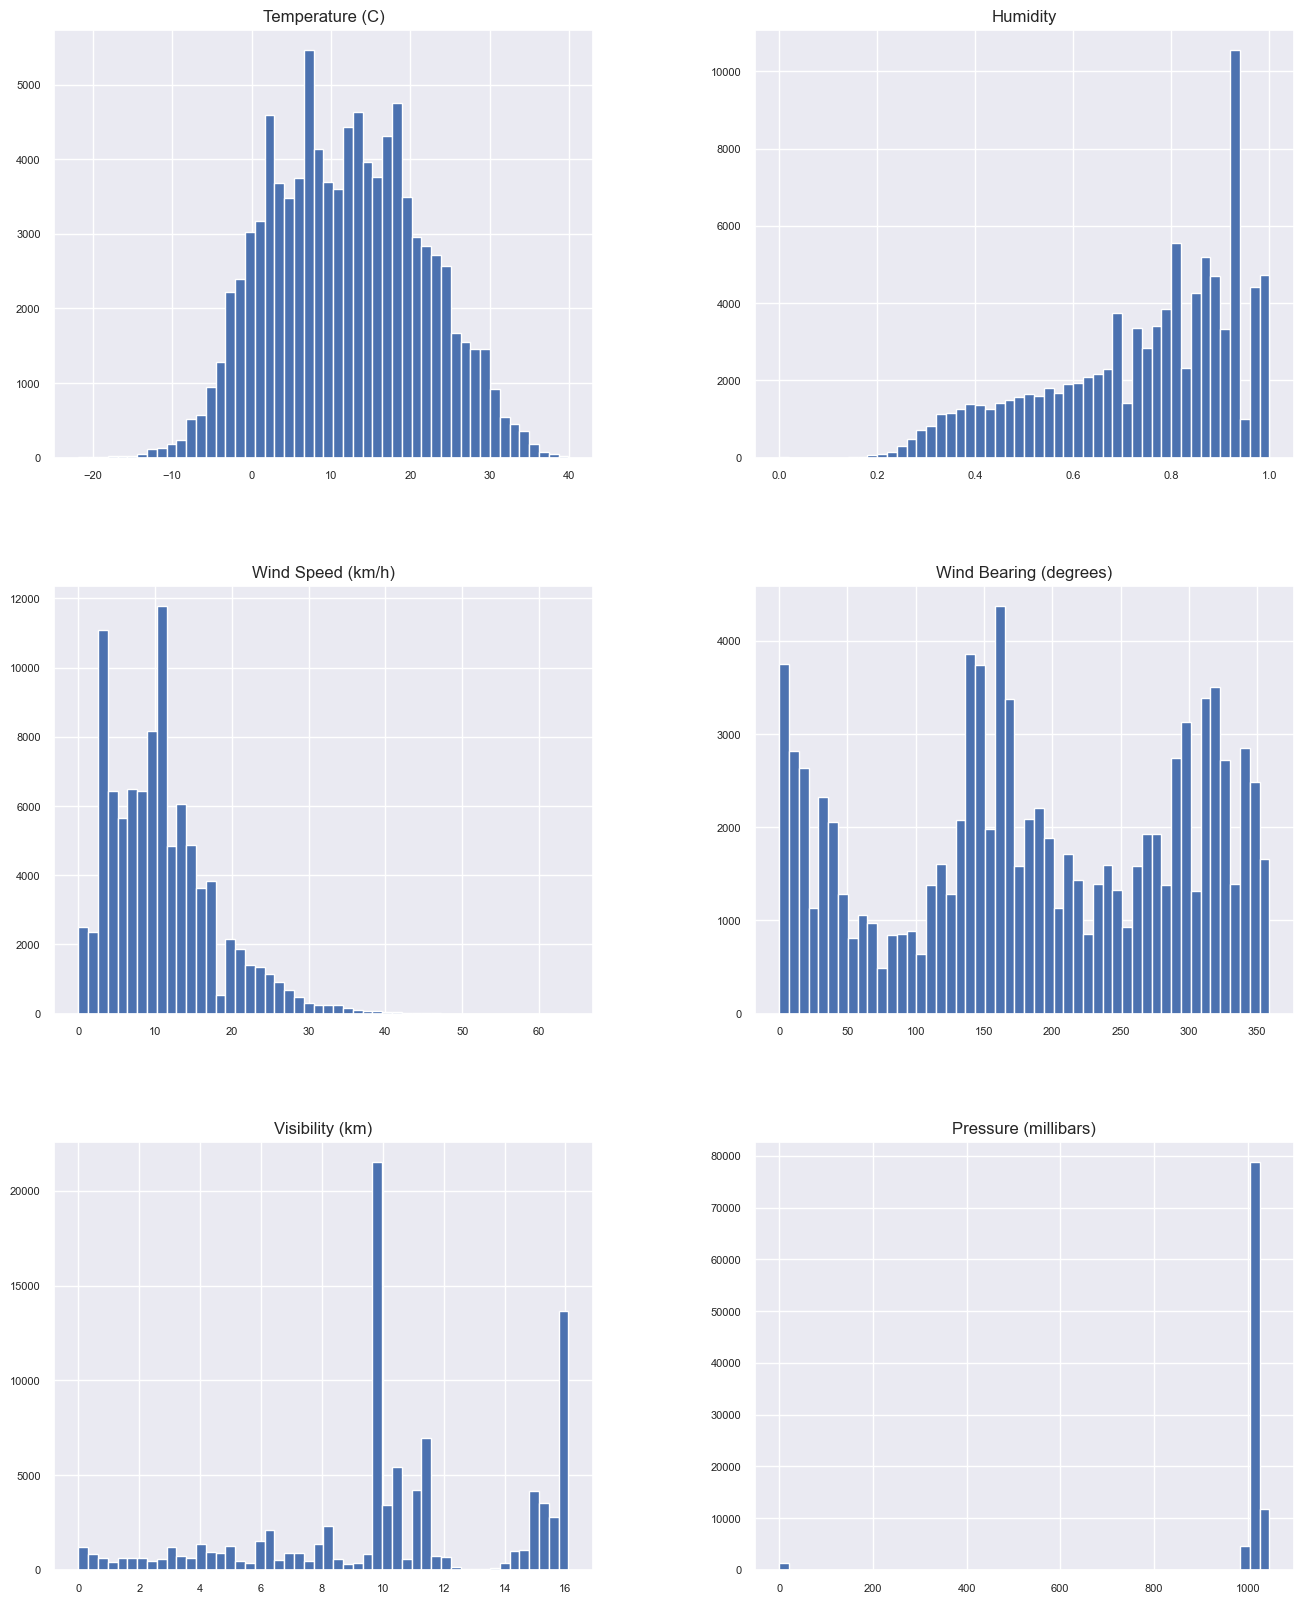

In [52]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Out of pressure observations look reasonable, let's check the pressure more closely

<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

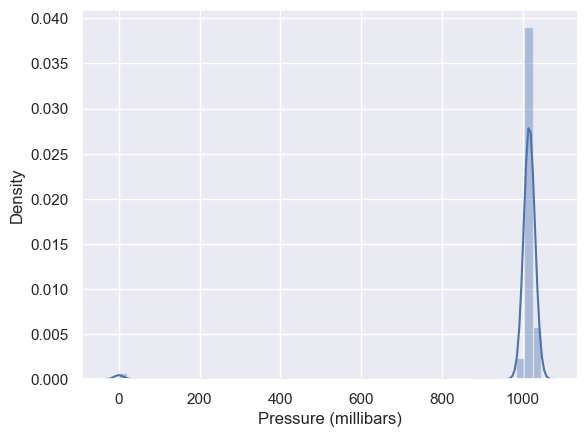

In [53]:
sns.distplot(df['Pressure (millibars)'])

Pressure contains incorrect 0 values, they will be supplemented with an average pressure value

In [55]:
# calculation of the average value for the pressure
pressure_median = df['Pressure (millibars)'].median()

In [56]:
# replacing 0 with the median value calculated above
df['Pressure (millibars)'].replace((0,pressure_median), inplace = True)

<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

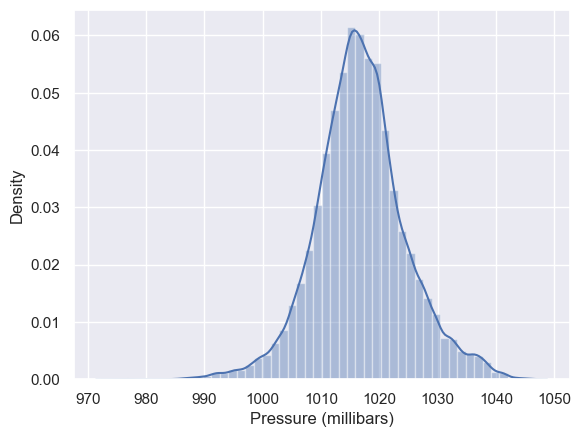

In [57]:
# checking the distribution on the chart after supplementing outliers
sns.distplot(df['Pressure (millibars)'])

# Feature Scaling

In [58]:
# checking column names after data cleaning
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [59]:
# prepare variable
y = df['Visibility (km)'] # the target variable

# the features excluding the target variable
X = df[['Summary', 'Precip Type', 'Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)','Pressure (millibars)']] 

In [60]:
# split data into train and test with an 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [61]:
# reset the indexes to be sequential
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [62]:
# checking X_train data
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,Overcast,rain,17.98,0.88,16.20,220.00,1003.70
1,Partly Cloudy,rain,22.80,0.70,9.66,328.00,1011.94
2,Overcast,rain,19.84,0.69,13.96,19.00,1014.57
3,Mostly Cloudy,snow,-8.75,0.92,14.02,80.00,1003.49
4,Clear,rain,9.06,0.71,3.38,187.00,1023.32
...,...,...,...,...,...,...,...
77138,Mostly Cloudy,rain,4.84,0.77,10.85,139.00,1022.10
77139,Partly Cloudy,rain,8.94,0.72,12.83,30.00,1029.10
77140,Partly Cloudy,rain,28.13,0.65,7.76,160.00,1015.53
77141,Mostly Cloudy,rain,23.97,0.50,14.91,343.00,1009.49


In [63]:
X_train['Summary'].unique()

array(['Overcast', 'Partly Cloudy', 'Mostly Cloudy', 'Clear', 'Foggy',
       'Other', 'Breezy and Overcast', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy'], dtype=object)

the names of the categories in the summary

In [64]:
X_train['Precip Type'].unique()

array(['rain', 'snow', 'none'], dtype=object)

the names of the categories in the Precip Type

In [65]:
# encode categorical features as a one-hot numeric array
ohe = OneHotEncoder()

In [66]:
# This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter)
ohe.fit_transform(X_train[['Summary', 'Precip Type']]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

will create columns according to the category names appearing in the Summary, if it is present in the given rows, it will return 1, if not 0. The same for precip type

In [67]:
# Fit to data, then transform it 
feature_array = ohe.fit_transform(X_train[['Summary', 'Precip Type']]).toarray()

In [68]:
# checking the category by fit model
ohe.categories_

[array(['Breezy and Mostly Cloudy', 'Breezy and Overcast',
        'Breezy and Partly Cloudy', 'Clear', 'Foggy', 'Mostly Cloudy',
        'Other', 'Overcast', 'Partly Cloudy'], dtype=object),
 array(['none', 'rain', 'snow'], dtype=object)]

two data array have been obtained, which should be merged into one

In [69]:
feature_labels = ohe.categories_

In [71]:
# Stack arrays in sequence horizontally (column wise).
feature_labels = np.hstack(feature_labels)
print(feature_labels)

['Breezy and Mostly Cloudy' 'Breezy and Overcast'
 'Breezy and Partly Cloudy' 'Clear' 'Foggy' 'Mostly Cloudy' 'Other'
 'Overcast' 'Partly Cloudy' 'none' 'rain' 'snow']


one array was created from the previous two

In [72]:
# Constructing DataFrame
features = pd.DataFrame(feature_array, columns = feature_labels)
features.head()

,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,none,rain,snow
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [73]:
# removing columns before onehotEncoding
X_train.drop(X_train[['Summary','Precip Type']],axis = 1,inplace = True)

In [74]:
# concatenate of the transformed data Summary and Precip Type, to the numeric category
X_train_enc = pd.concat([X_train, features], axis=1)
X_train_enc

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,none,rain,snow
0,17.98,0.88,16.20,220.00,1003.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,22.80,0.70,9.66,328.00,1011.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,19.84,0.69,13.96,19.00,1014.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,-8.75,0.92,14.02,80.00,1003.49,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,9.06,0.71,3.38,187.00,1023.32,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77138,4.84,0.77,10.85,139.00,1022.10,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
77139,8.94,0.72,12.83,30.00,1029.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
77140,28.13,0.65,7.76,160.00,1015.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
77141,23.97,0.50,14.91,343.00,1009.49,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [75]:
# standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train_enc)
X_train_scaled=scaler.transform(X_train_enc)

## prepare test data

In [76]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [77]:
# encode categorical features as a one-hot numeric array
feature_array_test = ohe.transform(X_test[['Summary', 'Precip Type']]).toarray()

features_test = pd.DataFrame(feature_array_test, columns = feature_labels)


In [78]:
X_test.drop(X_test[['Summary','Precip Type']],axis = 1,inplace = True)

In [79]:
X_test_enc = pd.concat([X_test, features_test], axis=1)
X_test_enc

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,none,rain,snow
0,16.02,0.31,21.96,282.00,1019.87,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,17.29,0.87,0.00,0.00,1020.79,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,7.17,0.92,20.64,331.00,1004.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,21.11,0.45,14.55,253.00,1008.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,19.87,0.78,2.88,144.00,1015.19,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19281,14.09,0.90,6.86,310.00,1019.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
19282,1.17,0.93,0.69,280.00,1035.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
19283,22.69,0.29,12.64,308.00,1017.72,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
19284,5.00,0.81,15.49,170.00,1019.39,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [80]:
# scale test data
X_test_scaled=scaler.transform(X_test_enc)

## LinearRegression  
that computes the linear relationship between a dependent variable and one or more independent features. 
The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables. 

In [86]:
# model teaching
reg_model = LinearRegression()
reg_model.fit(X_train_scaled,y_train)
# prediction
y_pred = reg_model.predict(X_test_scaled) #for test data
y_pred_train = reg_model.predict(X_train_scaled) # for train data

In [87]:
print('Results for train data')
print('Linear Regression R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Linear Regression MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Linear Regression R2 score: 0.45
Linear Regression MAE score: 2.57


In [88]:
print('Results for test data')
print('Linear Regression R2 score: '+ str(round(r2_score(y_test, y_pred),2)))
print('Linear Regression MAE score: '+ str(round(mae(y_test, y_pred),2)))


Results for test data
Linear Regression R2 score: 0.45
Linear Regression MAE score: 2.57


Low score is obtained due to a non-linear distribution of the data, a different model should be used

## Polynomial regression

In [99]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.fit_transform(X_test_scaled)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train,y_train)
y_pred_train = poly_reg_model.predict(X_poly_train)
y_pred_pol = poly_reg_model.predict(X_poly_test)

In [100]:
print('Results for train data')
print('Polynomial regression R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Polynomial regression MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Linear Regression R2 score: 0.52
Linear Regression MAE score: 2.4


In [102]:
print('Results for test data')
print('Polynomial regression R2 score: '+ str(round(r2_score(y_test, y_pred_pol),2)))
print('Polynomial regression MAE score: '+ str(round(mae(y_test, y_pred_pol),2)))


Results for test data
Linear Regression R2 score: 0.53
Linear Regression MAE score: 2.39


As with linear regression, the data is too different for the model to produce a satisfactory result

## Decision Tree Regressor

In [103]:

model = DecisionTreeRegressor()
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(5, 10),
                                'min_samples_split': range(400,1100, 100)
                                },
                  cv=10,
                  scoring='neg_mean_absolute_error')
gs.fit(X_train_scaled,y_train)
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 400}
2.213188188179737


In [104]:
tree_model = tree.DecisionTreeRegressor(random_state=111, max_depth=9, min_samples_split=400)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_train = tree_model.predict(X_train_scaled)

In [105]:
print('Results for train data')
print('Decision Tree Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Decision Tree Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Decision Tree Regressor R2 score: 0.57
Decision Tree Regressor MAE score: 2.19


In [106]:
print('Results for test data')
print('Decision Tree Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_tree),2)))
print('Decision Tree Regressor MAE score: '+ str(round(mae(y_test, y_pred_tree),2)))

Results for test data
Decision Tree Regressor R2 score: 0.57
Decision Tree Regressor MAE score: 2.2


In [107]:
feat_importance = tree_model.tree_.compute_feature_importances(normalize=False)
feat_importance = pd.concat([X_train_enc.columns.to_series().reset_index(drop=True), pd.Series(feat_importance)], axis=1)
feat_importance = feat_importance.sort_values(feat_importance.columns[1], ascending = False)
feat_importance

,0,1
9,Foggy,6.27
1,Humidity,1.87
0,Temperature (C),0.83
2,Wind Speed (km/h),0.49
12,Overcast,0.23
4,Pressure (millibars),0.07
3,Wind Bearing (degrees),0.06
8,Clear,0.02
11,Other,0.02
10,Mostly Cloudy,0.01


## Random Forest Regressor

In [157]:
regr = RandomForestRegressor(random_state=111)
regr.fit(X_train_scaled, y_train)
y_pred_rand = regr.predict(X_test_scaled)
y_pred_train = regr.predict(X_train_scaled)

In [158]:
print('Results for train data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Random Forest Regressor R2 score: 0.95
Random Forest Regressor MAE score: 0.73


In [159]:
print('Results for test data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_tree),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test, y_pred_tree),2)))

Results for test data
Random Forest Regressor R2 score: 0.57
Random Forest Regressor MAE score: 2.2


Random Hyperparameter Grid - first need to create a parameter grid to sample from during fitting

In [137]:
#
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [138]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [145]:
best_random = RandomForestRegressor(n_estimators= 1400,
 min_samples_split= 5,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=80,
 bootstrap= False)
best_random.fit(X_train_scaled, y_train)
y_pred_rand = regr.predict(X_test_scaled)
y_pred_train = regr.predict(X_train_scaled)

In [146]:
print('Results for test data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_rand),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test, y_pred_rand),2)))

Results for test data
Random Forest Regressor R2 score: 0.63
Random Forest Regressor MAE score: 1.96


Kroswalidacja

In [151]:
from sklearn.model_selection import cross_val_score, KFold

In [155]:
kf = KFold(n_splits=10, random_state=123, shuffle=True) #splits zazwyczaj 5/10
model = RandomForestRegressor(n_estimators= 1400,
 min_samples_split= 5,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=80,
 bootstrap= False)
score = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_error')

print('Cross Validation Score are {}'.format(-score))
print('Cross Validation Average Score is {}'.format(-score.mean()))

Cross Validation Score are [1.96437542 1.96534329 1.9624893  1.95606246 1.97681577 1.9682015
 1.97029101 1.94456635 1.94165163 1.96101376]
Cross Validation Average Score is 1.9610810500585476


## XGBRegressor

In [125]:
model = XGBRegressor(n_estimators=500, max_depth=9, eta=0.01, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train_scaled, y_train)
y_pred_XGBR = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

In [122]:
print('Results for train data')
print('XGB Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('XGB Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))


Results for train data
XGB Regressor R2 score: 0.87
XGB Regressor MAE score: 1.15


In [123]:
print('Results for test data')
print('XGB Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_XGBR),2)))
print('XGB Regressor MAE score: '+ str(round(mae(y_test,y_pred_XGBR),2)))

Results for test data
XGB Regressor R2 score: 0.64
XGB Regressor MAE score: 1.95


In [168]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 10,20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return mae(y_test, y_pred)

In [169]:
# Create the study
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-08-03 15:05:55,708] A new study created in memory with name: regression
[I 2023-08-03 15:06:10,901] Trial 0 finished with value: 2.437431167286284 and parameters: {'max_depth': 18, 'learning_rate': 0.28809941772608977, 'n_estimators': 259, 'min_child_weight': 2, 'gamma': 0.5851142745676724, 'subsample': 0.3511031543023216, 'colsample_bytree': 0.3624835009266627, 'reg_alpha': 0.5548856877286583, 'reg_lambda': 0.586676681220379, 'random_state': 998}. Best is trial 0 with value: 2.437431167286284.
[I 2023-08-03 15:06:22,868] Trial 1 finished with value: 2.220134423589038 and parameters: {'max_depth': 12, 'learning_rate': 0.32122241433447635, 'n_estimators': 626, 'min_child_weight': 6, 'gamma': 0.976136192913234, 'subsample': 0.7206612312419932, 'colsample_bytree': 0.1683057075047158, 'reg_alpha': 0.9308966054213088, 'reg_lambda': 0.39449713817717896, 'random_state': 534}. Best is trial 1 with value: 2.220134423589038.
[I 2023-08-03 15:07:11,761] Trial 2 finished with value: 143.79

In [170]:
print('Best parameters', study.best_params)

Best parameters {'max_depth': 18, 'learning_rate': 0.04351032420697919, 'n_estimators': 518, 'min_child_weight': 4, 'gamma': 0.1651174003340849, 'subsample': 0.8406362137570084, 'colsample_bytree': 0.9795521556276744, 'reg_alpha': 0.11331139236229773, 'reg_lambda': 0.8431122094953342, 'random_state': 505}


In [171]:
model = XGBRegressor(max_depth= 18, 
                     learning_rate= 0.04351032420697919, 
                     n_estimators=518, 
                     min_child_weight= 4, 
                     gamma= 0.1651174003340849, 
                     subsample= 0.8406362137570084, 
                     colsample_bytree= 0.9795521556276744, 
                     reg_alpha=0.11331139236229773, 
                     reg_lambda=0.8431122094953342, 
                     random_state=505)
model.fit(X_train_scaled, y_train)
y_pred_XGBR = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

In [172]:
print('Results for train data')
print('XGB Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('XGB Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
XGB Regressor R2 score: 0.99
XGB Regressor MAE score: 0.31


In [173]:
print('Results for test data')
print('XGB Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_XGBR),2)))
print('XGB Regressor MAE score: '+ str(round(mae(y_test,y_pred_XGBR),2)))

Results for test data
XGB Regressor R2 score: 0.65
XGB Regressor MAE score: 1.87


In [124]:
#reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
#models,predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
models